In [1]:
import spikeinterface.full as si

In [2]:
%matplotlib widget

### Use simulated data for now

In [3]:
rec, sort = si.generate_ground_truth_recording(durations=[60], num_channels=128, num_units=50)

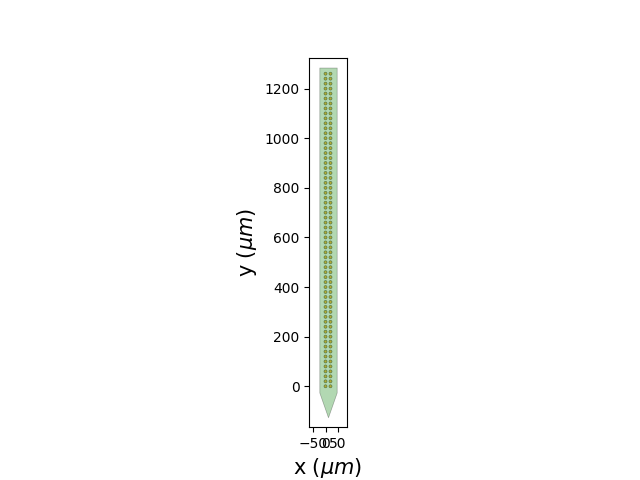

In [4]:
si.plot_probe_map(rec)

In [5]:
si.plot_traces(rec, backend="ipywidgets")

AppLayout(children=(TimeSlider(children=(Dropdown(description='segment', options=(0,), value=0), Button(icon='…

### Extract waveforms

Start with simulated data

In [6]:
we = si.extract_waveforms(rec, sort, folder=None, mode="memory", n_jobs=-1)

extract waveforms shared_memory multi buffer:   0%|          | 0/60 [00:00<?, ?it/s]

extract waveforms shared_memory multi buffer:   0%|          | 0/60 [00:00<?, ?it/s]

### Get spike scalings

In [7]:
amp_scalings = si.compute_amplitude_scalings(we)

extract amplitude scalings:   0%|          | 0/60 [00:00<?, ?it/s]

## Get residuals

In [8]:
all_templates = we.get_all_templates()

In [9]:
residuals_w_scaling = si.InjectTemplatesRecording(
    sorting=sort,
    templates=-all_templates,
    amplitude_factor=amp_scalings,
    parent_recording=rec
)
residuals_wout_scaling = si.InjectTemplatesRecording(
    sorting=sort,
    templates=-all_templates,
    amplitude_factor=None,
    parent_recording=rec
)

In [10]:
rec_dict = dict(
    original=rec,
    residuals_w=residuals_w_scaling,
    residuals_wout=residuals_wout_scaling
)

In [11]:
si.plot_traces(rec_dict, backend="ipywidgets")

AppLayout(children=(TimeSlider(children=(Dropdown(description='segment', options=(0,), value=0), Button(icon='…

# Use a local NWB file

In [13]:
recording = si.read_nwb_recording(
    "/home/alessio/Documents/Data/IBL/sub-CSHL045_ses-46794e05-3f6a-4d35-afb3-9165091a5a74_behavior+ecephys+image.nwb",
    electrical_series_path="acquisition/ElectricalSeriesAp"
)

In [14]:
recording

NwbRecordingExtractor: 384 channels - 30.0kHz - 1 segments - 160,103,832 samples 
                       5,336.79s (1.48 hours) - int16 dtype - 114.52 GiB
  file_path: /home/alessio/Documents/Data/IBL/sub-CSHL045_ses-46794e05-3f6a-4d35-afb3-9165091a5a74_behavior+ecephys+image.nwb

In [15]:
sorting = si.read_nwb_sorting(
    "/home/alessio/Documents/Data/IBL/sub-CSHL045_ses-46794e05-3f6a-4d35-afb3-9165091a5a74_behavior+ecephys+image.nwb",
    electrical_series_path="acquisition/ElectricalSeriesAp"
)

/home/alessio/Documents/Codes/spike_sorting/spikeinterface/spikeinterface/src/spikeinterface/extractors/nwbextractors.py:1260: UserWarning: Skipping spike_amplitudes because of unequal shapes across units
  warnings.warn(f"Skipping {property_name} because of unequal shapes across units")
/home/alessio/Documents/Codes/spike_sorting/spikeinterface/spikeinterface/src/spikeinterface/extractors/nwbextractors.py:1260: UserWarning: Skipping spike_relative_depths because of unequal shapes across units
  warnings.warn(f"Skipping {property_name} because of unequal shapes across units")


In [16]:
sorting

NwbSortingExtractor: 590 units - 1 segments - 30.0kHz
  file_path: /home/alessio/Documents/Data/IBL/sub-CSHL045_ses-46794e05-3f6a-4d35-afb3-9165091a5a74_behavior+ecephys+image.nwb

In [17]:
clip_minutes = 5

In [18]:
sampling_frequency = recording.sampling_frequency

In [63]:
start_time = 1200
start_frame = int(start_time * sampling_frequency)
end_frame = int((start_time + clip_minutes * 60)* sampling_frequency)

In [64]:
recording_c = recording.frame_slice(start_frame, end_frame)
sorting_c = sorting.frame_slice(start_frame, end_frame)

FrameSliceSorting: 590 units - 1 segments - 30.0kHz

In [65]:
recording_processed = si.highpass_filter(recording_c)
recording_processed = si.common_reference(recording_processed)

In [66]:
we = si.extract_waveforms(recording_processed, sorting_c, mode="memory", n_jobs=-1)

extract waveforms shared_memory multi buffer:   0%|          | 0/300 [00:00<?, ?it/s]

extract waveforms shared_memory multi buffer:   0%|          | 0/300 [00:00<?, ?it/s]

extract waveforms shared_memory multi buffer:   0%|          | 0/300 [00:00<?, ?it/s]

extract waveforms shared_memory multi buffer:   0%|          | 0/300 [00:00<?, ?it/s]

In [29]:
len(we.unit_ids)

590

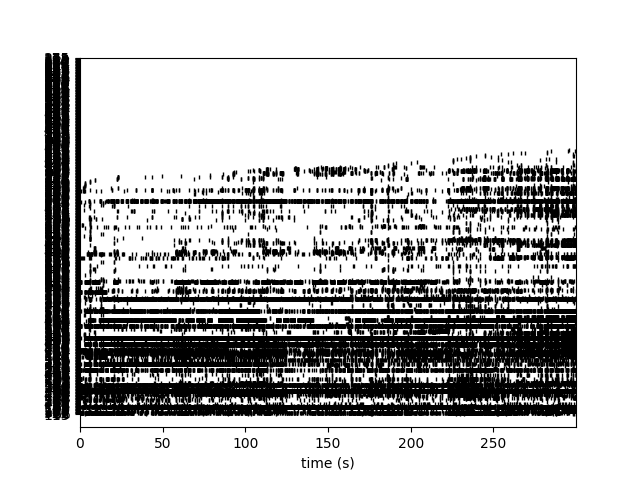

In [67]:
si.plot_rasters(sorting_c)

In [68]:
amp_scalings = si.compute_amplitude_scalings(we)

extract amplitude scalings:   0%|          | 0/300 [00:00<?, ?it/s]

In [28]:
sorting_c.get_property_keys()

['allen_location',
 'alternative_contamination',
 'beryl_location',
 'contamination',
 'cosmos_location',
 'drift',
 'firing_rate',
 'label',
 'maximum_amplitude',
 'maximum_amplitude_channel',
 'mean_relative_depth',
 'median_amplitude',
 'minimum_amplitude',
 'missed_spikes_estimate',
 'noise_cutoff',
 'presence_ratio',
 'presence_ratio_standard_deviation',
 'probe_name',
 'sliding_refractory_period_violation',
 'spike_count',
 'standard_deviation_amplitude']

In [39]:
recording_scaled = si.scale(recording_processed, gain=recording.get_channel_gains(), dtype="float32")

In [40]:
all_templates = we.get_all_templates()

In [41]:
residuals_w_scaling = si.InjectTemplatesRecording(
    sorting=sorting_c,
    templates=-all_templates,
    amplitude_factor=amp_scalings,
    nbefore=we.nbefore,
    parent_recording=we.recording
)
residuals_wout_scaling = si.InjectTemplatesRecording(
    sorting=sorting_c,
    templates=-all_templates,
    amplitude_factor=None,
    nbefore=we.nbefore,
    parent_recording=we.recording
)

In [42]:
rec_dict = dict(
    original=recording_processed,
    residuals_w=residuals_w_scaling,
    residuals_wout=residuals_wout_scaling
)

In [30]:
all_templates.shape

(590, 90, 384)

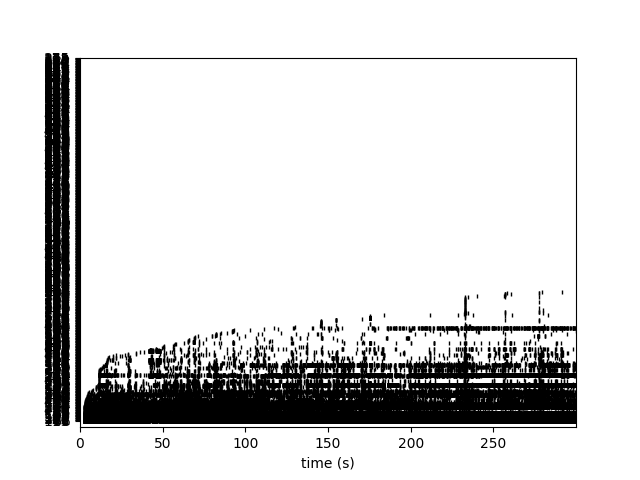

In [44]:
si.plot_rasters(sorting_c)

In [47]:
spike_counts = sorting_c.count_num_spikes_per_unit()

In [48]:
spike_counts

{'115': 15225,
 '86': 24429,
 '62': 16650,
 '522': 10594,
 '140': 19738,
 '125': 13693,
 '107': 15377,
 '153': 7029,
 '513': 1251,
 '152': 7622,
 '98': 12587,
 '143': 12989,
 '31': 1959,
 '129': 2822,
 '25': 229,
 '22': 278,
 '23': 560,
 '10': 233,
 '498': 118,
 '11': 15,
 '19': 714,
 '512': 456,
 '97': 2268,
 '525': 2473,
 '101': 1625,
 '24': 1376,
 '524': 180,
 '41': 1798,
 '28': 54,
 '21': 185,
 '516': 905,
 '150': 424,
 '499': 52,
 '157': 3704,
 '94': 30,
 '14': 11,
 '521': 57,
 '58': 439,
 '60': 449,
 '40': 49,
 '497': 52,
 '93': 1968,
 '61': 496,
 '508': 101,
 '509': 114,
 '9': 32,
 '38': 41,
 '144': 636,
 '141': 247,
 '114': 1066,
 '121': 50,
 '164': 125,
 '484': 7,
 '501': 56,
 '112': 148,
 '45': 1,
 '68': 502,
 '85': 424,
 '151': 6310,
 '95': 44,
 '219': 1,
 '173': 1,
 '84': 147,
 '26': 4,
 '527': 5,
 '145': 300,
 '87': 14,
 '466': 2,
 '291': 3,
 '207': 3,
 '464': 1,
 '271': 12,
 '103': 149,
 '4': 801,
 '149': 6949,
 '0': 869,
 '570': 14,
 '502': 7,
 '569': 2,
 '18': 17,
 '7':

In [49]:
recording_c.get_times()[0]

0.0

In [57]:
len(sorting_c.get_unit_spike_train("115", return_times=True))

15225

In [ ]:
for unit in we.unit_ids:
    

In [60]:
times_155 = we.sorting.get_unit_spike_train("115", return_times=True)

In [62]:
len(times_155)

15225

In [61]:
print(times_155[0], times_155[-1])

2.4122333333333335 299.9919


In [46]:
si.plot_unit_templates(we, backend="ipywidgets")

AppLayout(children=(HBox(children=(Checkbox(value=False, description='same axis'), Checkbox(value=True, descri…

In [43]:
si.plot_traces(rec_dict, backend="ipywidgets")

AppLayout(children=(TimeSlider(children=(Dropdown(description='segment', options=(0,), value=0), Button(icon='…

In [53]:
for unit in sorting_c.unit_ids:
    print(unit, len(sorting_c.get_unit_spike_train(unit)))

115 15225
86 24429
62 16650
522 10594
140 19738
125 13693
107 15377
153 7029
513 1251
152 7622
98 12587
143 12989
31 1959
129 2822
25 229
22 278
23 560
10 233
498 118
11 15
19 714
512 456
97 2268
525 2473
101 1625
24 1376
524 180
41 1798
28 54
21 185
516 905
150 424
499 52
157 3704
94 30
14 11
521 57
58 439
60 449
40 49
497 52
93 1968
61 496
508 101
509 114
9 32
38 41
144 636
141 247
114 1066
121 50
164 125
484 7
501 56
112 148
45 1
68 502
85 424
151 6310
95 44
219 1
173 1
84 147
26 4
527 5
145 300
87 14
466 2
291 3
207 3
464 1
271 12
103 149
4 801
149 6949
0 869
570 14
502 7
569 2
18 17
7 10
495 59
15 3
117 468
119 14
12 57
247 4
69 132
573 24
249 15
160 54
102 2029
100 161
106 77
48 10
47 15
124 138
586 30
122 217
120 15
49 10
52 2
137 112
64 5
507 2
35 10
138 166
20 14
496 3
158 16
506 50
134 3
526 57
113 221
130 22
71 2
128 166
127 1
475 1
481 1
155 17
263 1
288 2
105 3
480 1
253 3
88 72
403 4
353 23
490 7
318 1
174 3
297 1
148 6
159 27
273 3
492 1
311 1
3 24
146 8
110 3
528 19
156

## Detection analysis

In [ ]:
from spikeinterface.core.node_pipeline import 

# Stream NWB

### Load IBL recording

In [ ]:
rec_ibl = si.read_nwb_recording(
    file_path="https://api.dandiarchive.org/api/assets/b2fee6b4-6049-4720-8d3d-44f8ec483527/download/",
    stream_mode="remfile",
    electrical_series_path="acquisition/ElectricalSeriesAp00"
)

In [ ]:
rec_f = si.highpass_filter(rec_ibl)
rec_de = si.highpass_spatial_filter(rec_f)
rec_cmr = si.common_reference(rec_f)

In [ ]:
rec_dict = dict(
    raw=rec_ibl,
    hp=rec_f,
    destripe=rec_de,
    cmr=rec_cmr
)

In [ ]:
si.plot_traces(rec_dict, backend="ipywidgets")

### Save 10 s data

In [ ]:
rec_ibl_cut = rec_ibl.frame_slice(0, int(10 * rec_ibl.sampling_frequency))

In [ ]:
rec_ibl_saved = rec_ib_cut.save(folder="ibl_snippet_10", n_jobs=-1)

In [ ]:
rec_f = si.highpass_filter(rec_ibl_cut)
rec_de = si.highpass_spatial_filter(rec_f)
rec_cmr = si.common_reference(rec_f)

ValueError: zero-size array to reduction operation minimum which has no identity

In [16]:
debug

> /home/alessio/anaconda3/envs/si/lib/python3.10/site-packages/numpy/core/fromnumeric.py(88)_wrapreduction()
     86                 return reduction(axis=axis, out=out, **passkwargs)
     87 
---> 88     return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
     89 
     90 

ipdb> u
> /home/alessio/anaconda3/envs/si/lib/python3.10/site-packages/numpy/core/fromnumeric.py(2953)min()
   2951     6
   2952     """
-> 2953     return _wrapreduction(a, np.minimum, 'min', axis, None, out,
   2954                           keepdims=keepdims, initial=initial, where=where)
   2955 

ipdb> u
> /home/alessio/anaconda3/envs/si/lib/python3.10/site-packages/probeinterface/probe.py(1289)get_slice()
   1287         elif selection.dtype.kind == "i":
   1288             assert np.unique(selection).size == selection.size
-> 1289             assert 0 <= np.min(selection) < n, f"An index within your selection is out of bounds {np.min(selection)}"
   1290             assert 0 <= np.max(selection) < n, f

In [14]:
recording.sampling_frequency

30000.0

### Load IBL recording

In [ ]:
rec_ibl = si.read_nwb_recording(
    file_path="https://api.dandiarchive.org/api/assets/b2fee6b4-6049-4720-8d3d-44f8ec483527/download/",
    stream_mode="remfile",
    electrical_series_path="acquisition/ElectricalSeriesAp00"
)

In [ ]:
rec_f = si.highpass_filter(rec_ibl)
rec_de = si.highpass_spatial_filter(rec_f)
rec_cmr = si.common_reference(rec_f)

In [ ]:
rec_dict = dict(
    raw=rec_ibl,
    hp=rec_f,
    destripe=rec_de,
    cmr=rec_cmr
)

In [ ]:
si.plot_traces(rec_dict, backend="ipywidgets")

### Save 10 s data

In [ ]:
rec_ibl_cut = rec_ibl.frame_slice(0, int(10 * rec_ibl.sampling_frequency))

In [ ]:
rec_ibl_saved = rec_ib_cut.save(folder="ibl_snippet_10", n_jobs=-1)

In [ ]:
rec_f = si.highpass_filter(rec_ibl_cut)
rec_de = si.highpass_spatial_filter(rec_f)
rec_cmr = si.common_reference(rec_f)

## Load IBL sorting

In [ ]:
from one.api import ONE
from brainbox.io.one import SpikeSortingLoader
one = ONE(base_url='https://openalyx.internationalbrainlab.org')

In [ ]:
pid = '410ecab4-1d7b-4c57-85a8-dfebf29feba8'
sl = SpikeSortingLoader(pid=pid, one=one)
spikes, clusters, channels = sl.load_spike_sorting()

In [ ]:
sort_ibl_cut = sort_ibl.frame_slice(0, int(10 * rec_ibl.sampling_frequency))
sort_ibl_saved = sort_ibl_cut.save(folder="ibl_sort_snippet_10")

In [ ]:
sort_ibl_cut = sort_ibl.frame_slice(0, int(10 * rec_ibl.sampling_frequency))
sort_ibl_saved = sort_ibl_cut.save(folder="ibl_sort_snippet_10")

In [ ]:
pid = '410ecab4-1d7b-4c57-85a8-dfebf29feba8'
sl = SpikeSortingLoader(pid=pid, one=one)
spikes, clusters, channels = sl.load_spike_sorting()

In [ ]:
from one.api import ONE
from brainbox.io.one import SpikeSortingLoader
one = ONE(base_url='https://openalyx.internationalbrainlab.org')

## Load IBL sorting

In [ ]:
rec_f = si.highpass_filter(rec_ibl_cut)
rec_de = si.highpass_spatial_filter(rec_f)
rec_cmr = si.common_reference(rec_f)